In [3]:
import numpy as np
from surroundmodulation.utils.misc import rescale, pickleread, picklesave
import matplotlib.pyplot as plt 
import cv2

def plot_grid(images, grid_size=(6,6), masks=None, titles=None, pixel_min = -1.7876, pixel_max = 2.1919, display_min=0, display_max=255, figsize=(13,13), save=None):
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=figsize)
    if masks == None: 
        masks = [None]*grid_size[0]*grid_size[1]
    else:
        print("Can't rescale images due to mask presence: minmax set to (0, 255)")
    if titles ==None: 
        titles = [None]*grid_size[0]*grid_size[1]
    for ax, original_image, mask, title in zip(axes.ravel(), images, masks, titles):
        normalized_image = rescale(original_image, pixel_min, pixel_max, 0, 1)
        if mask is not None:
            # Threshold the mask
            _, binary = cv2.threshold(mask, 0.5, 1, cv2.THRESH_BINARY)

            # # Convert binary float mask to uint8 for contour detection
            binary_uint8 = (binary * 255).astype(np.uint8)

            # # Find contours
            contours, _ = cv2.findContours(binary_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Sort contours by area and keep the largest one
            contours = sorted(contours, key=cv2.contourArea, reverse=True)
            largest_contour = contours[0]
            
            # Create an RGB version of the original image to overlay contour
            overlay_image = np.stack([normalized_image]*3, axis=-1)
            # Draw the largest contour on the original image in red
            cv2.drawContours(overlay_image, [largest_contour], -1, (1, 0, 0), 1)
        else: 
            overlay_image = rescale(normalized_image, 0, 1,0, 255)
        #  Display using matplotlib
            ax.set_title(title)
        ax.imshow(overlay_image, cmap='Greys_r', vmin=display_min, vmax=display_max)
        ax.axis('off')  # Turn off axis numbers and ticks
    plt.tight_layout()
    if save!=None:
        plt.savefig(save)
    plt.show()


In [4]:
x = pickleread('/project/experiment_data/convnext/data_v2.pickle')
idxs = pickleread('/project/experiment_data/convnext/gabor_idx.pickle')

# MEI

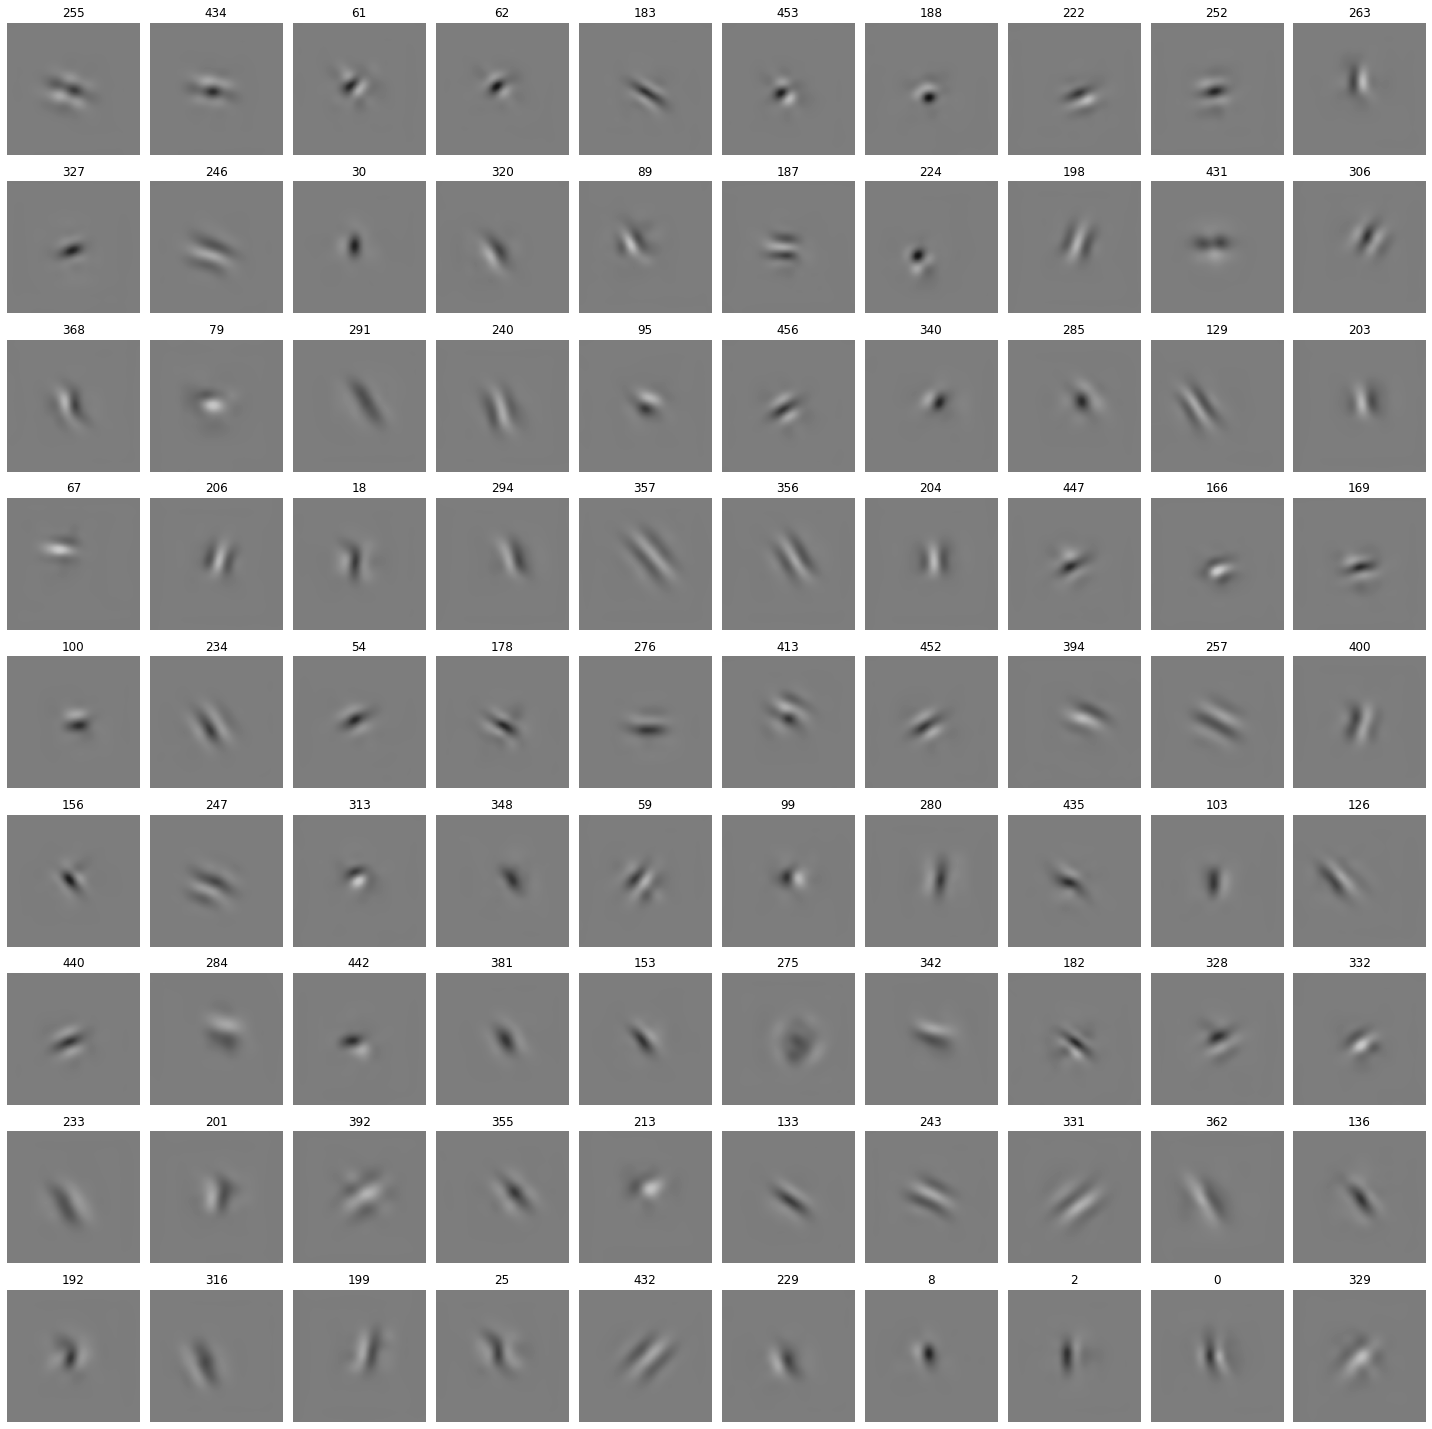

In [5]:
meis = [x[idx]['mei'] for idx in idxs]
plot_grid(
    images = meis,
    titles = [str(k) for k in idxs],
    grid_size=(9,10), 
    figsize=(20,20),
    display_min=rescale(-.9, -1.7876, 2.1919, 0, 255),
    display_max=rescale(.9, -1.7876, 2.1919, 0, 255),
)

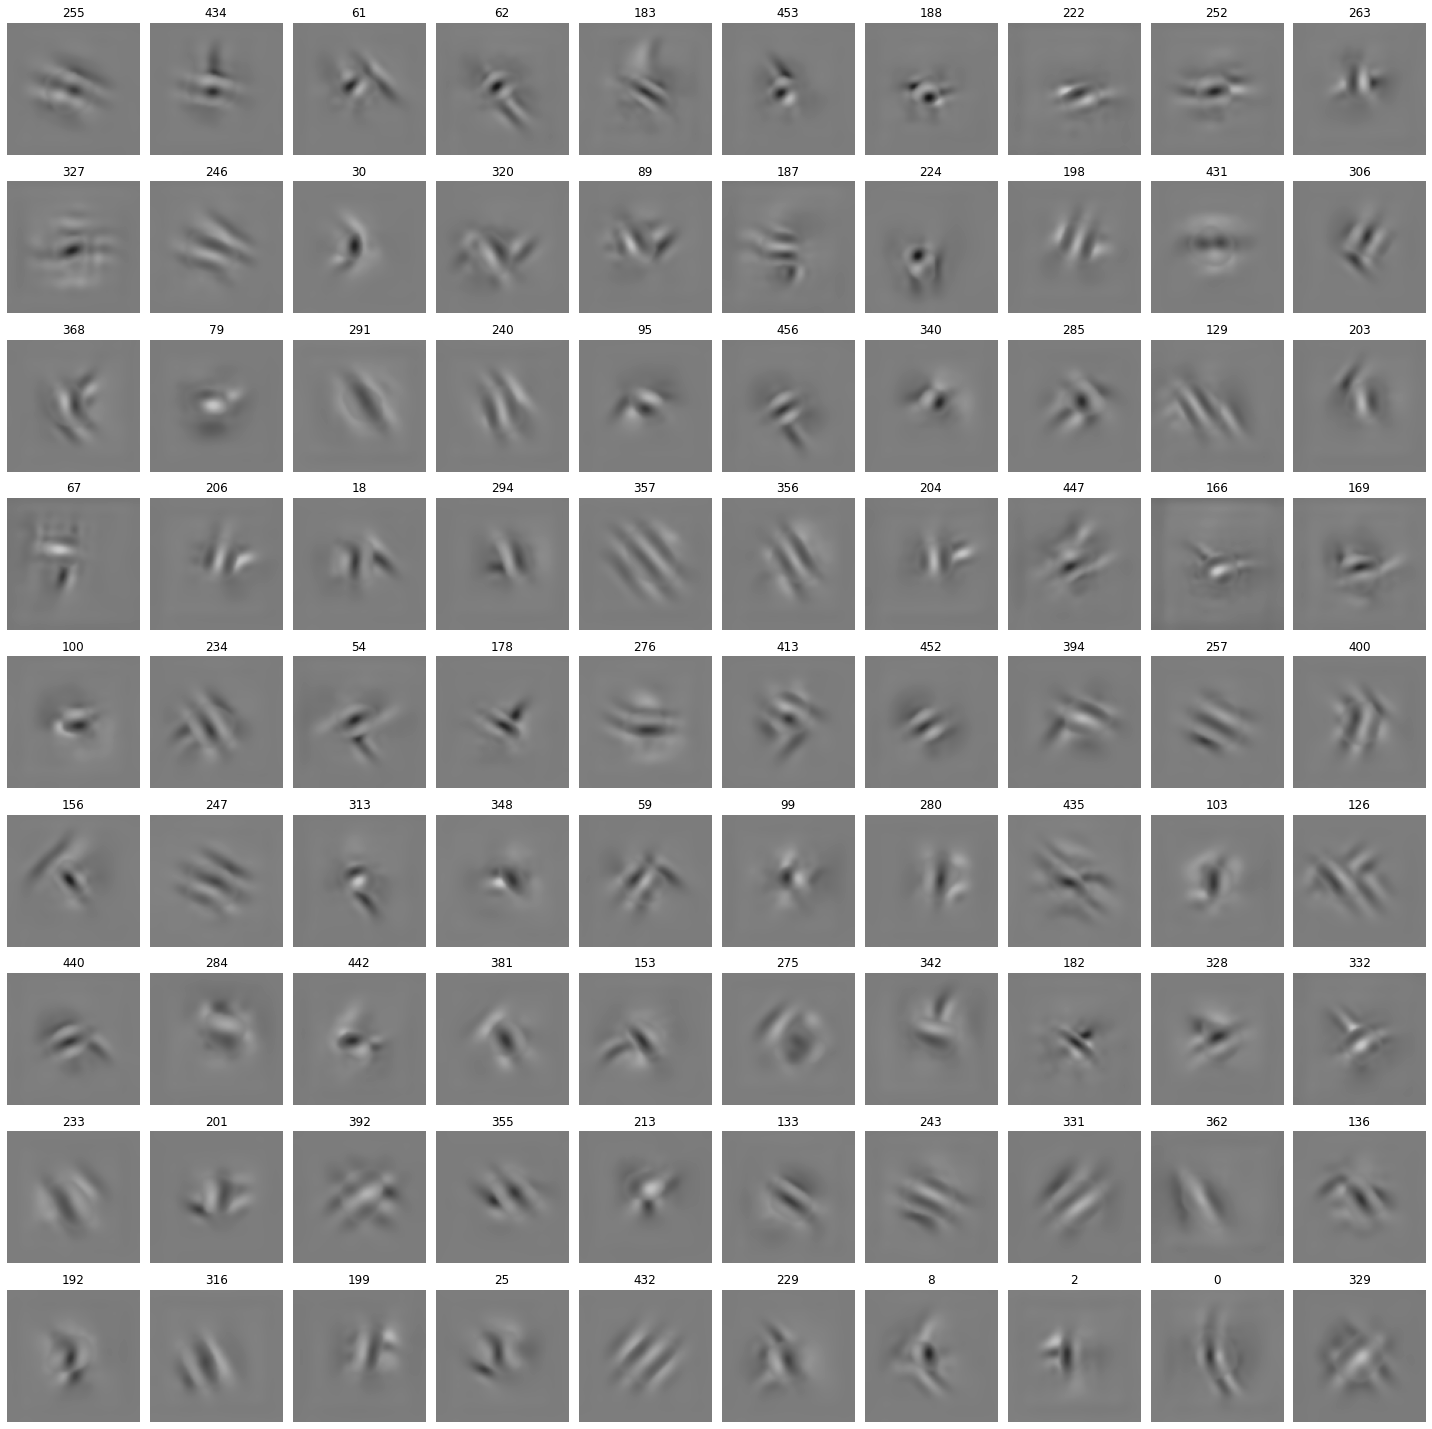

In [6]:
exc_full_surr = [x[idx]['exc_full_surr'] for idx in idxs]
plot_grid(
    images = exc_full_surr,
    titles = [str(k) for k in idxs],
    grid_size=(9,10), 
    figsize=(20,20),
    display_min=rescale(-.9, -1.7876, 2.1919, 0, 255),
    display_max=rescale(.9, -1.7876, 2.1919, 0, 255)
)

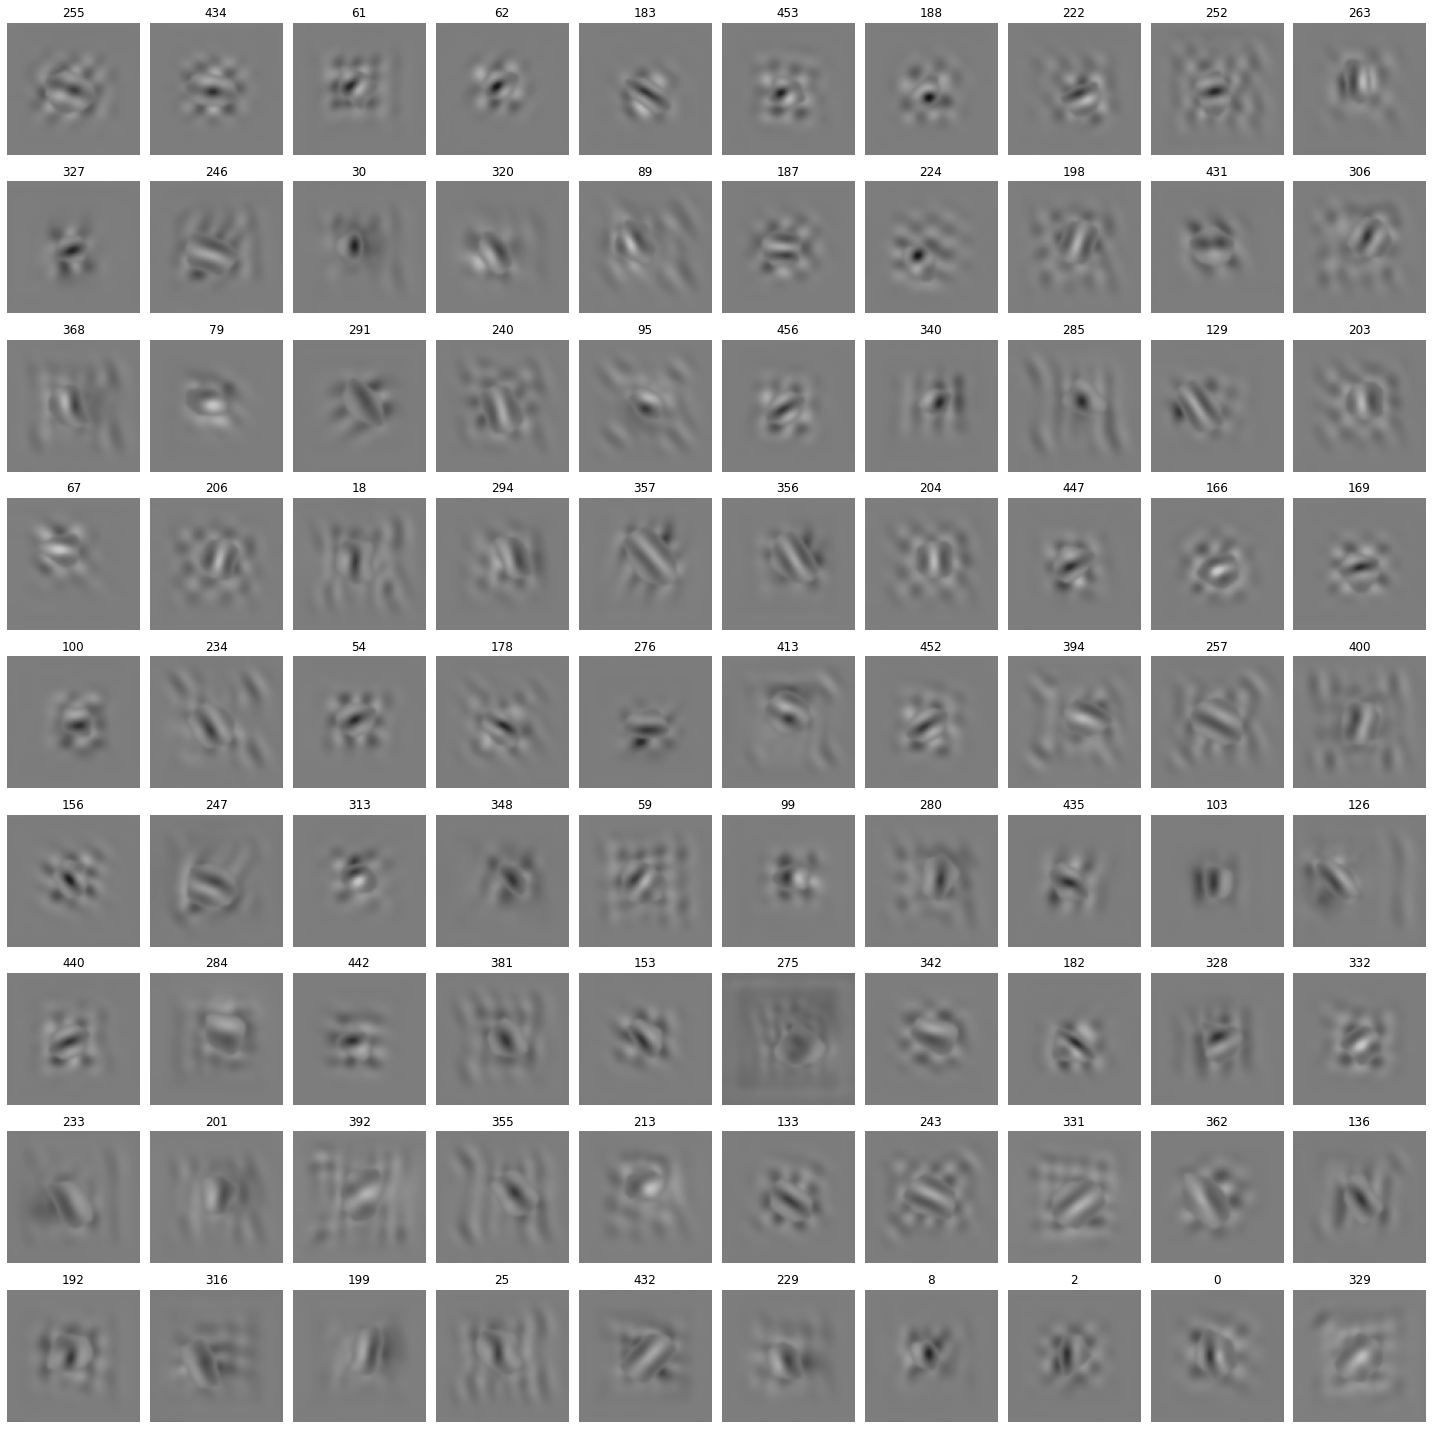

In [7]:
inh_full_surr = [x[idx]['inh_full_surr'] for idx in idxs]
plot_grid(
    images = inh_full_surr,
    titles = [str(k) for k in idxs],
    grid_size=(9,10), 
    figsize=(20,20),
    display_min=rescale(-.9, -1.7876, 2.1919, 0, 255),
    display_max=rescale(.9, -1.7876, 2.1919, 0, 255),
)

# check activity

exc_surr


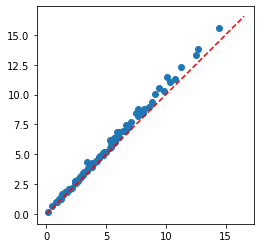

ính_surr


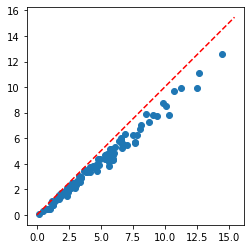

In [8]:
exc_surr_act = [x[idx]['exc_full_surr_act'] for idx in idxs]
inh_surr_act = [x[idx]['inh_full_surr_act'] for idx in idxs]
mei_act =  [x[idx]['mei_act'] for idx in idxs]


import matplotlib.pyplot as plt

def scatterplot(x, y, xlabel=None, ylabel=None):
    # Sample data for scatter plot

    # Create scatter plot
    plt.scatter(x, y)
    x = np.array(x)
    y = np.array(y)

    # Set the aspect of the plot to be equal
    x_max = np.max([x.max(), y.max()])
    # Set y-axis limits to be the same as x-axis

    # Draw bisectrice line
    plt.plot([0, x_max + 1], [0, x_max + 1], 'r--')  # Red dashed line for the bisectrice
    plt.axis('square')
    if xlabel!=None:
        plt.xlabel(xlabel)
    if ylabel!=None:
        plt.ylabel(ylabel)
    # Show plot
    plt.show()


print('exc_surr')
scatterplot(mei_act, exc_surr_act)
print('ính_surr')
scatterplot(mei_act, inh_surr_act)

# Masked grating

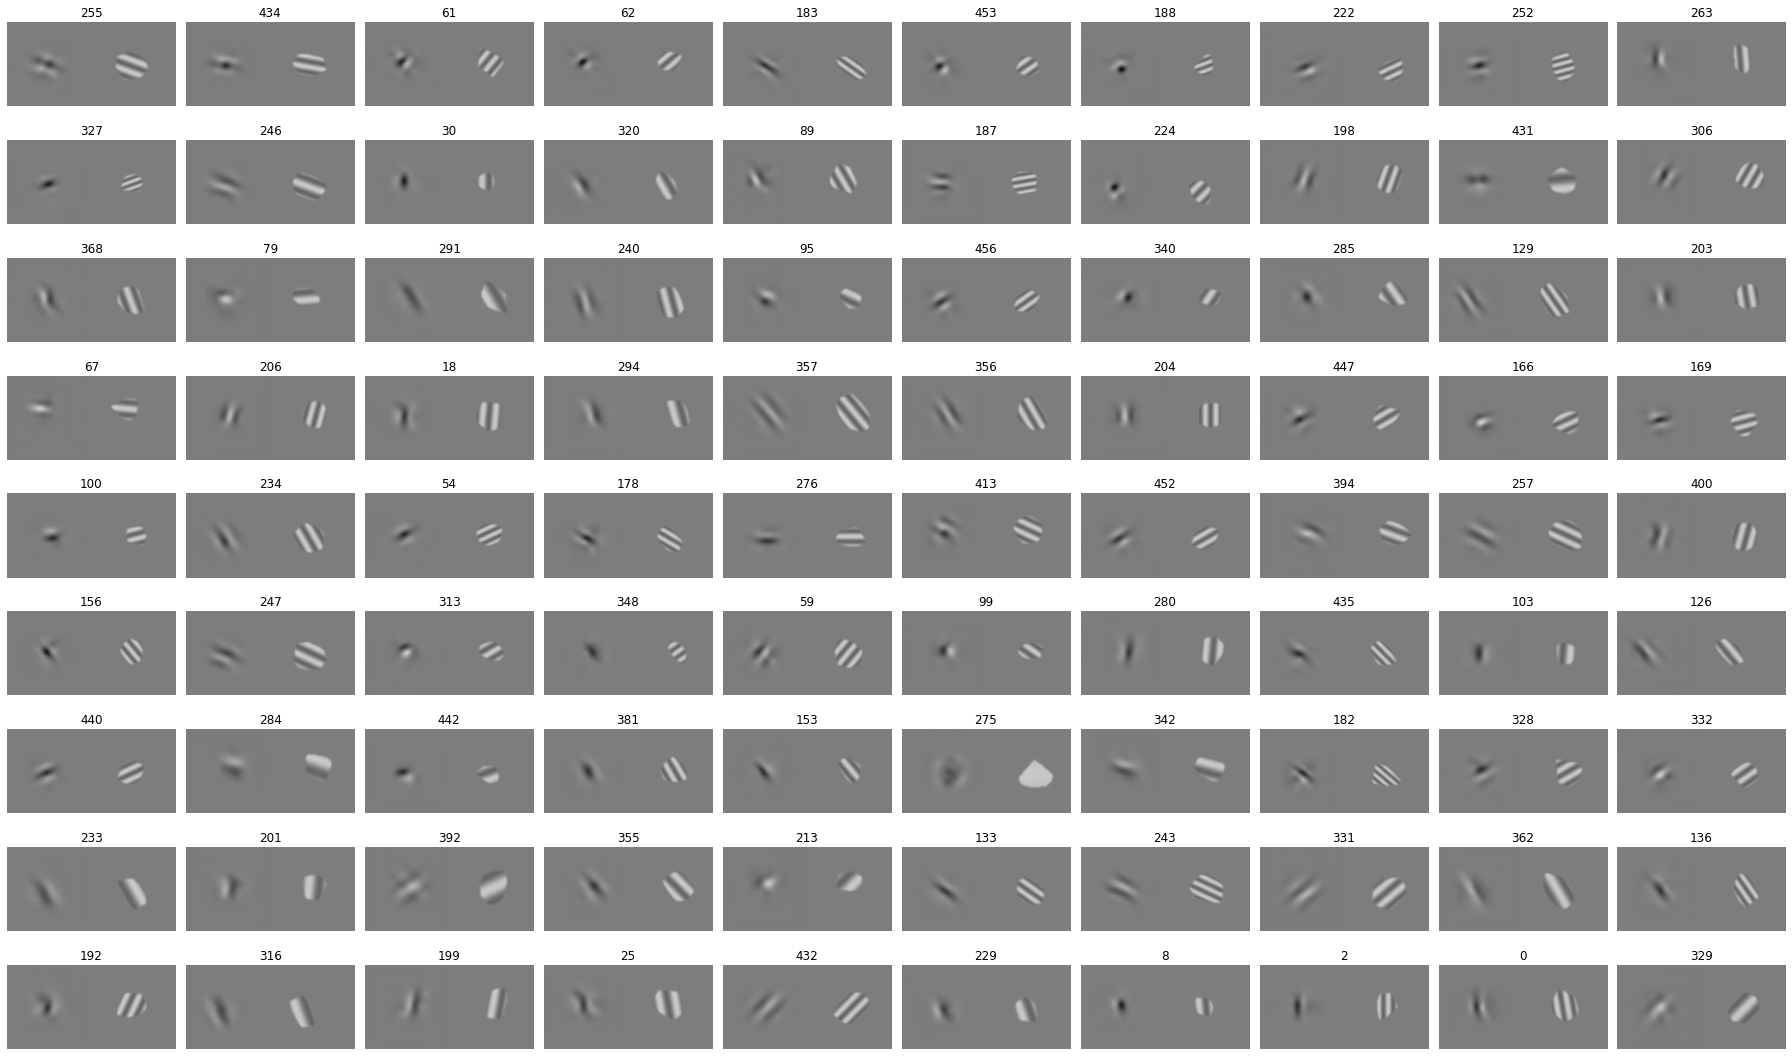

In [9]:
masked_grating_max_stim = [x[idx]['masked_grating_max_stim'].detach().cpu().numpy().squeeze() for idx in idxs]
masked_grating_max_resp = [x[idx]['masked_grating_max_resp'] for idx in idxs]
plot_grid(
    images = np.concatenate([meis, masked_grating_max_stim], axis=2),
    titles = [str(k)  for k in idxs],
    grid_size=(9,10), 
    figsize=(25,15),
    display_min=55,
     display_max=200,
)

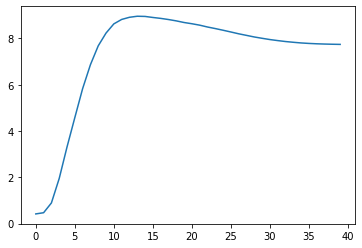

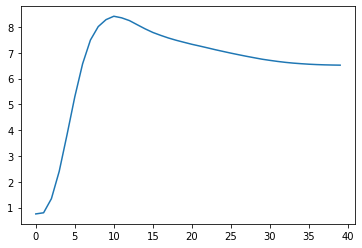

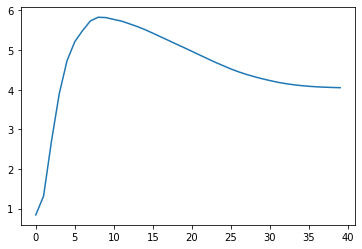

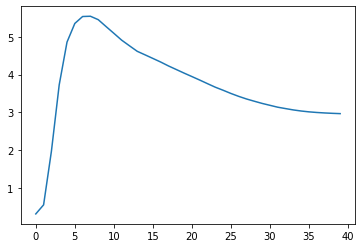

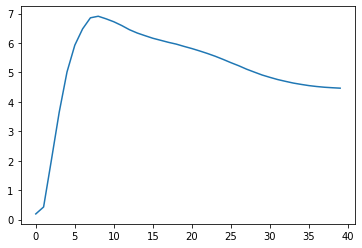

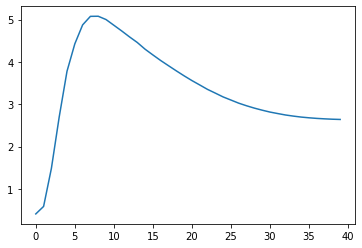

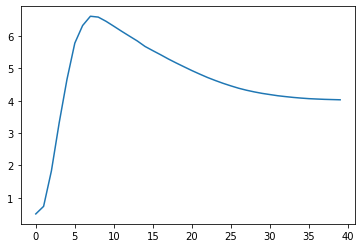

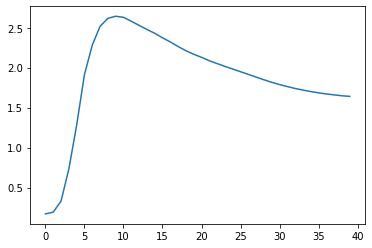

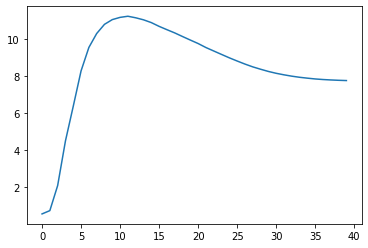

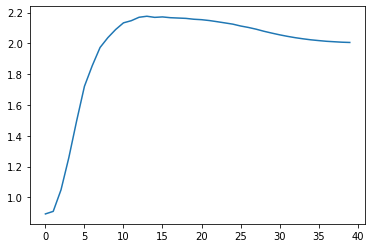

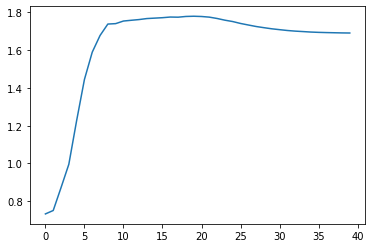

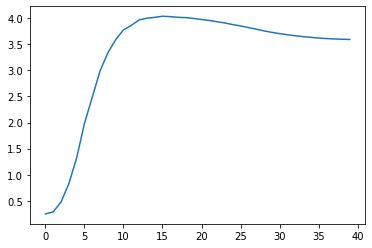

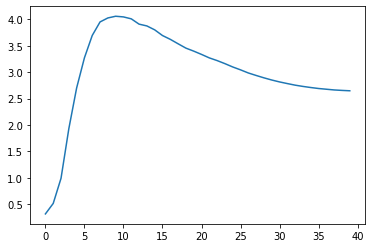

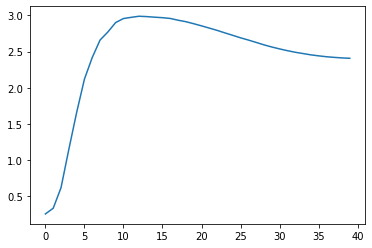

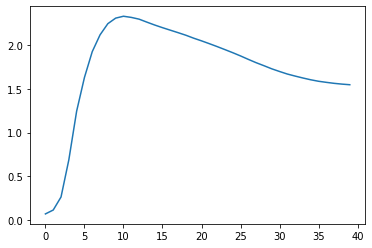

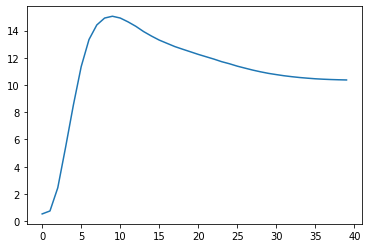

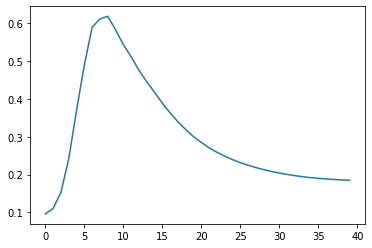

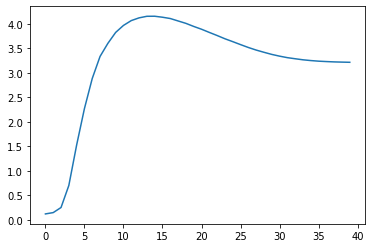

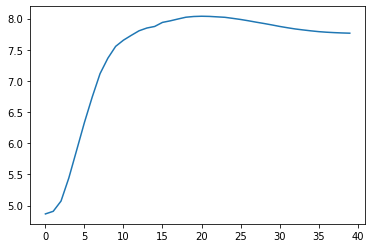

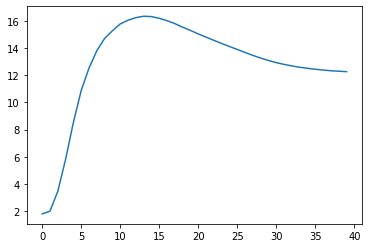

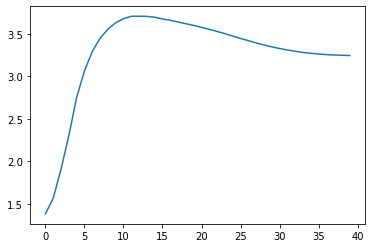

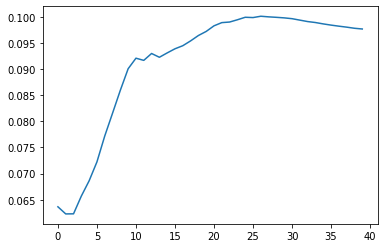

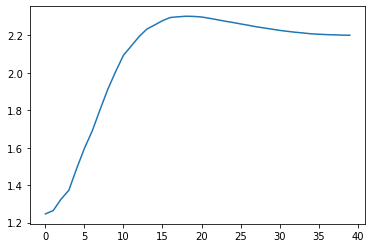

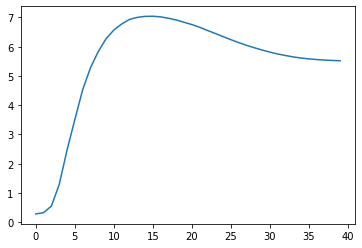

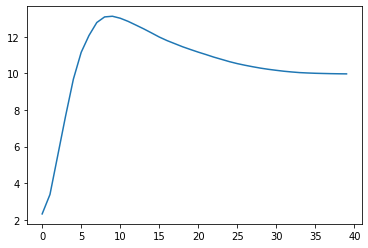

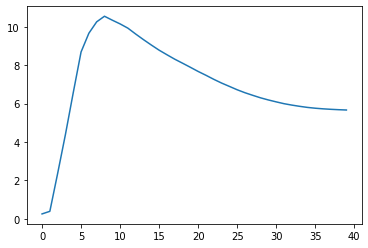

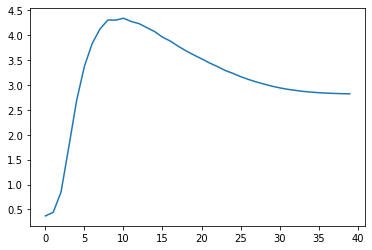

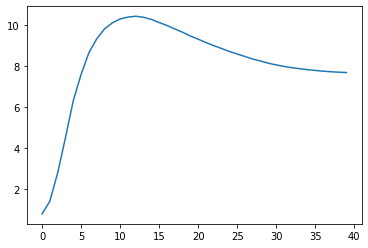

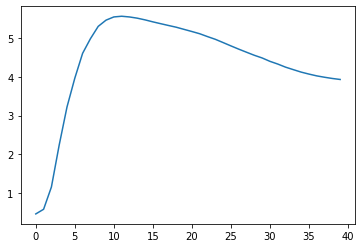

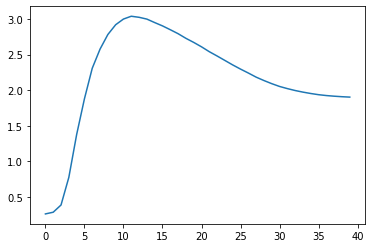

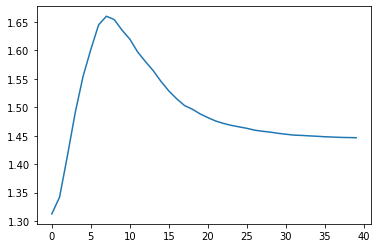

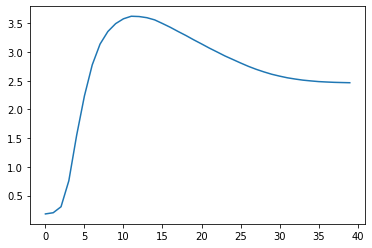

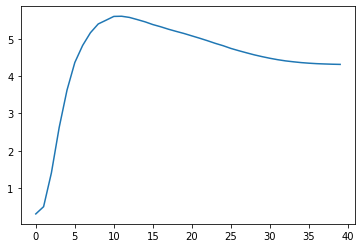

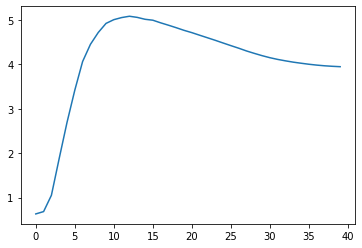

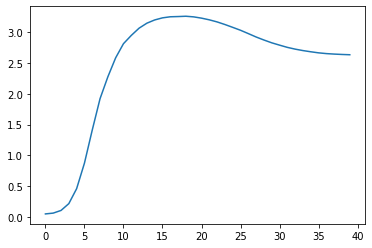

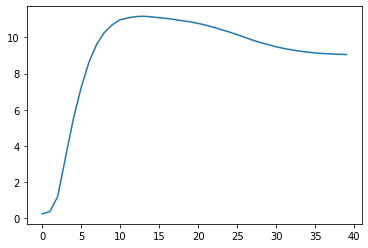

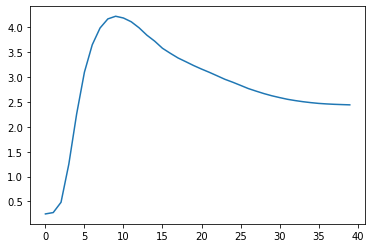

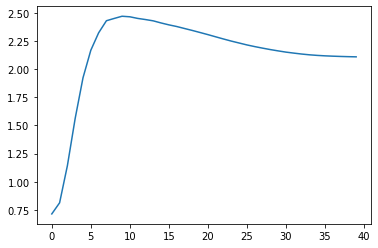

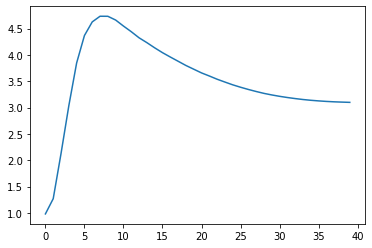

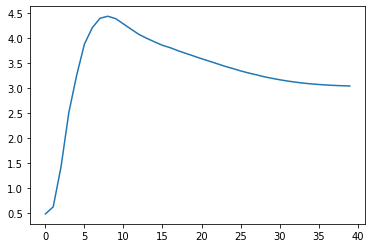

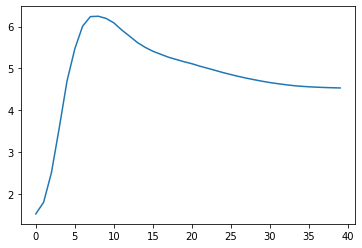

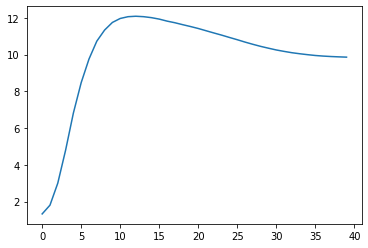

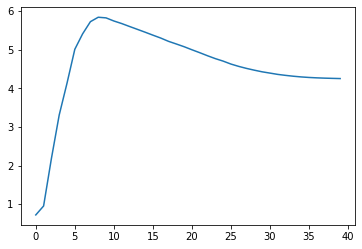

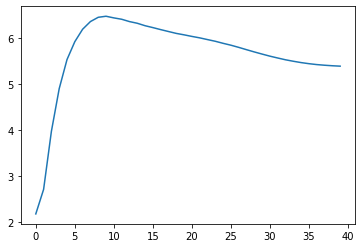

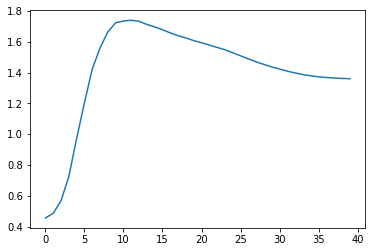

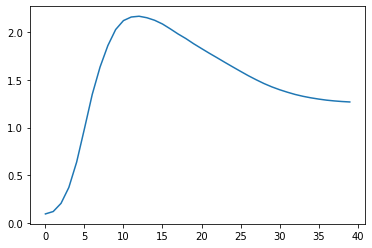

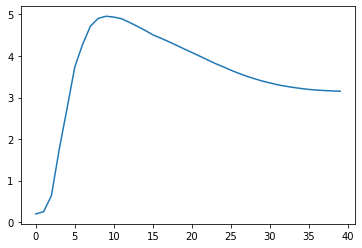

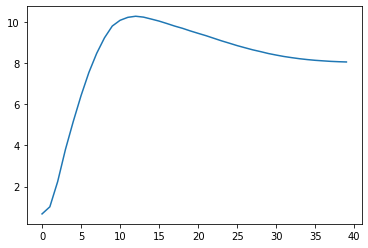

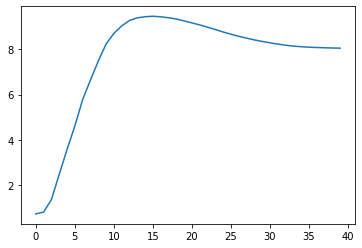

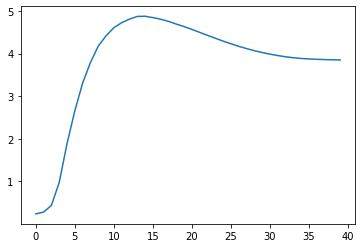

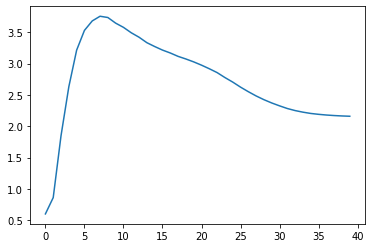

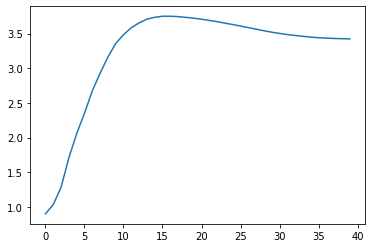

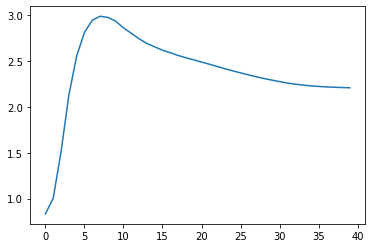

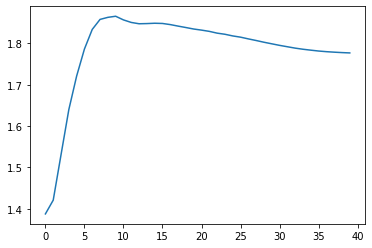

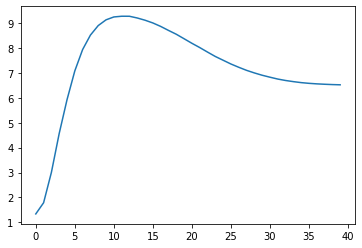

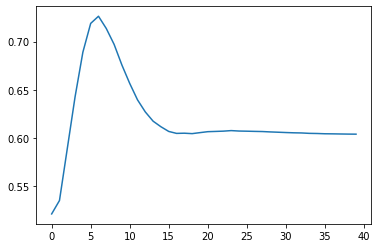

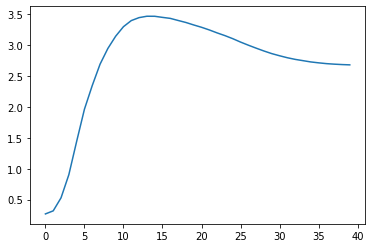

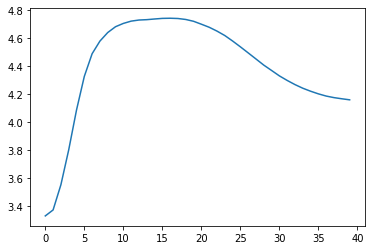

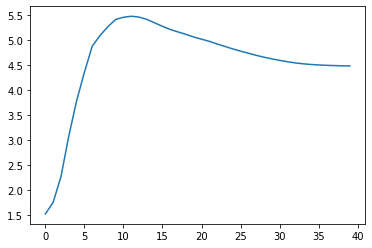

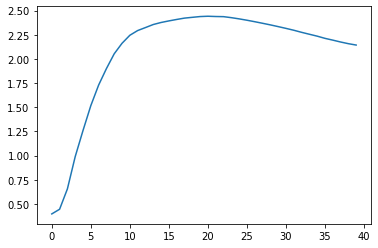

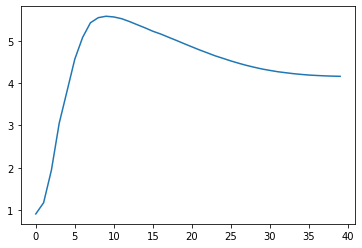

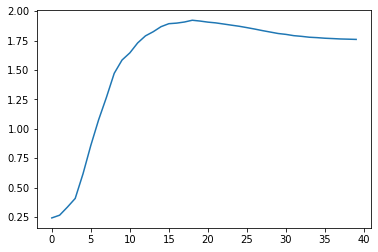

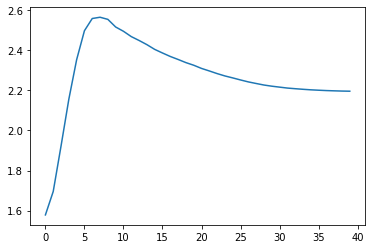

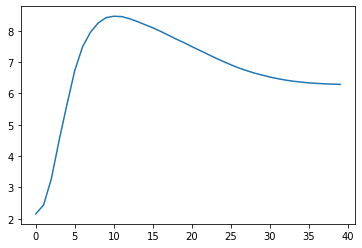

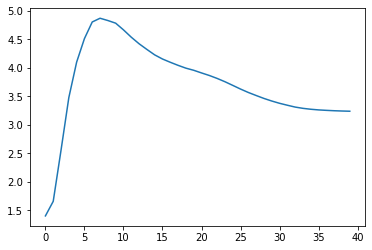

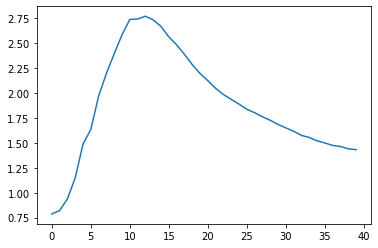

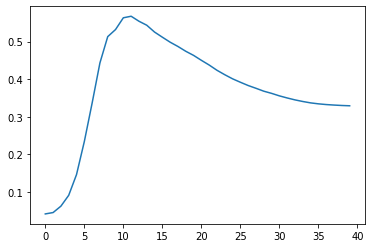

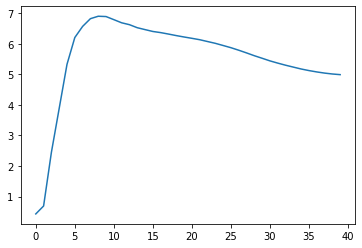

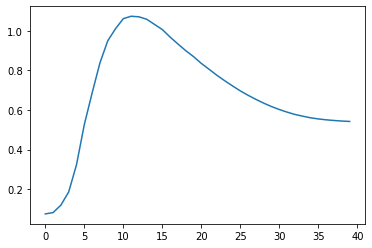

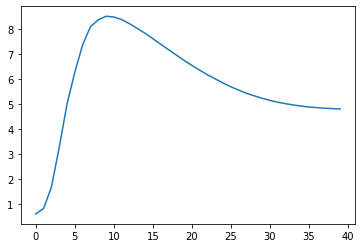

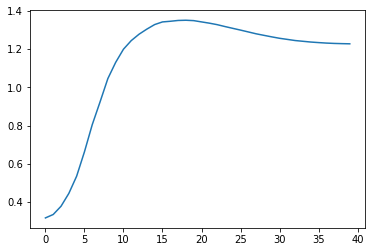

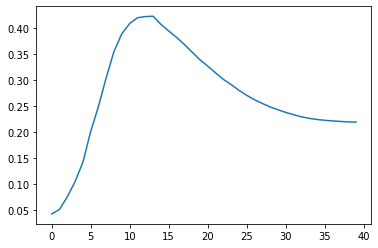

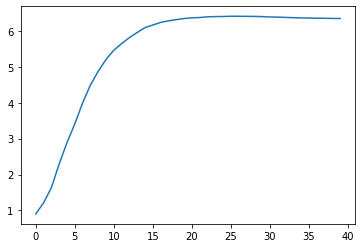

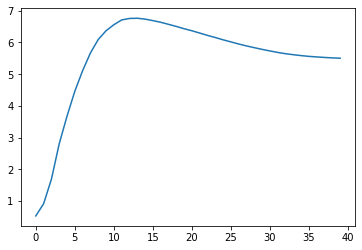

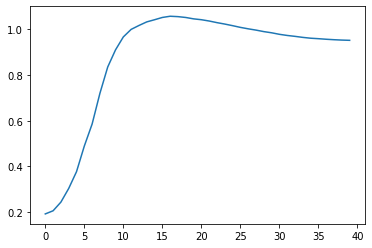

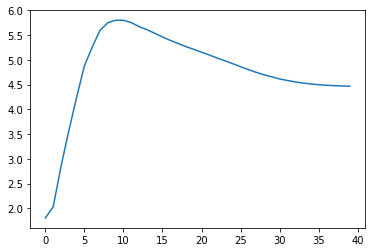

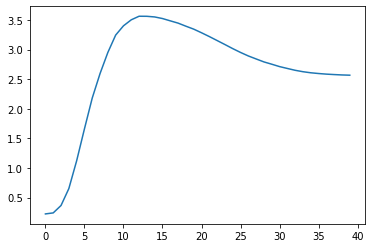

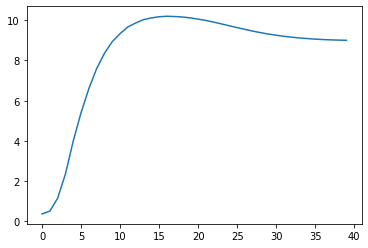

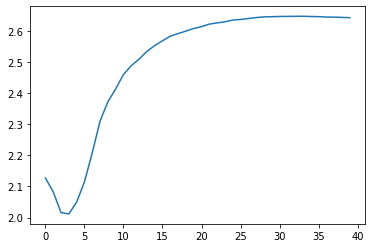

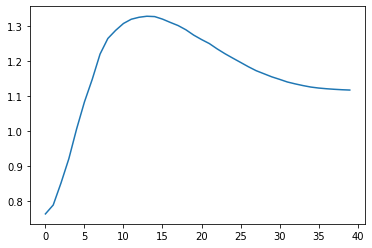

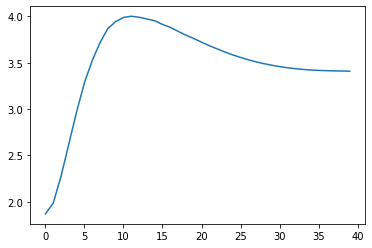

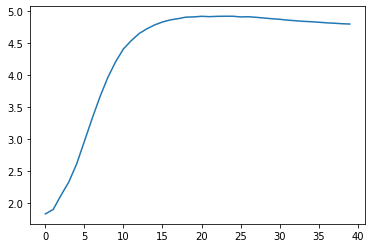

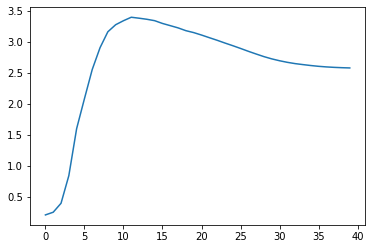

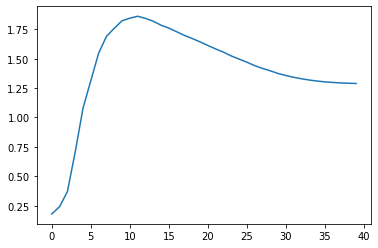

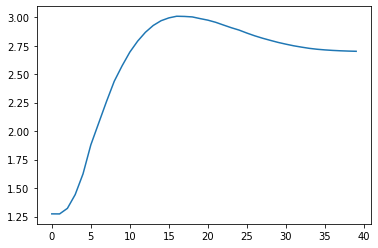

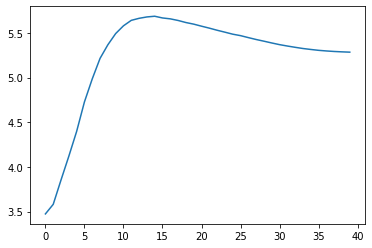

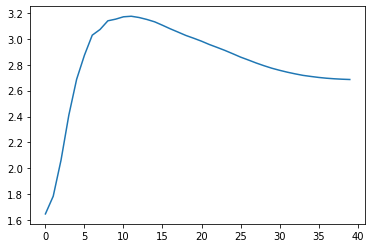

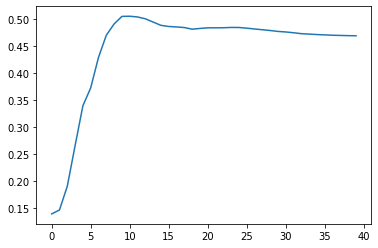

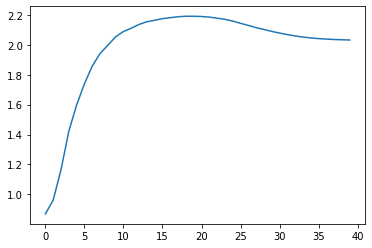

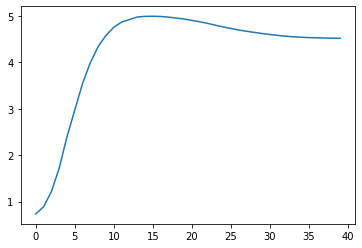

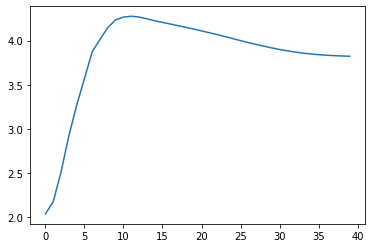

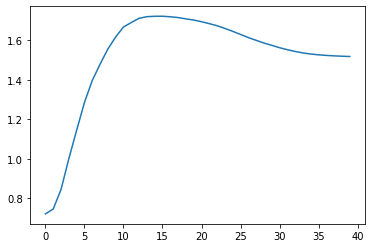

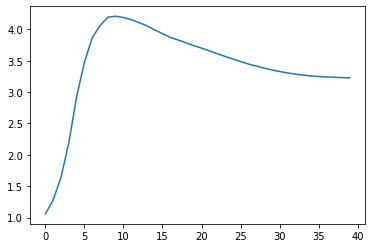

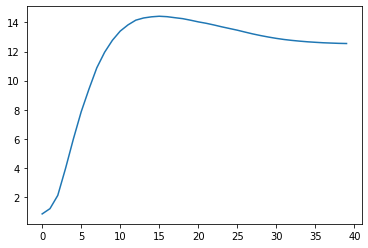

In [10]:
size_tuning_resp = [x[idx]['size_tuning_resp'].mean(axis=-1) for idx in idxs]
for resp_curve in size_tuning_resp:
    plt.plot(resp_curve)
    plt.show()

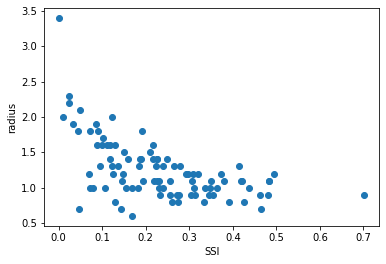

In [11]:
size_tuning_resp = np.array([x[idx]['size_tuning_resp'].mean(axis=-1) for idx in idxs])
ssi = 1-size_tuning_resp[:, -1]/size_tuning_resp.max(axis=1)
radius =  np.array([x[idx]['size_tuning_top_radius'] for idx in idxs])
plt.scatter(ssi, radius)
plt.xlabel('SSI')
plt.ylabel('radius')
plt.show()

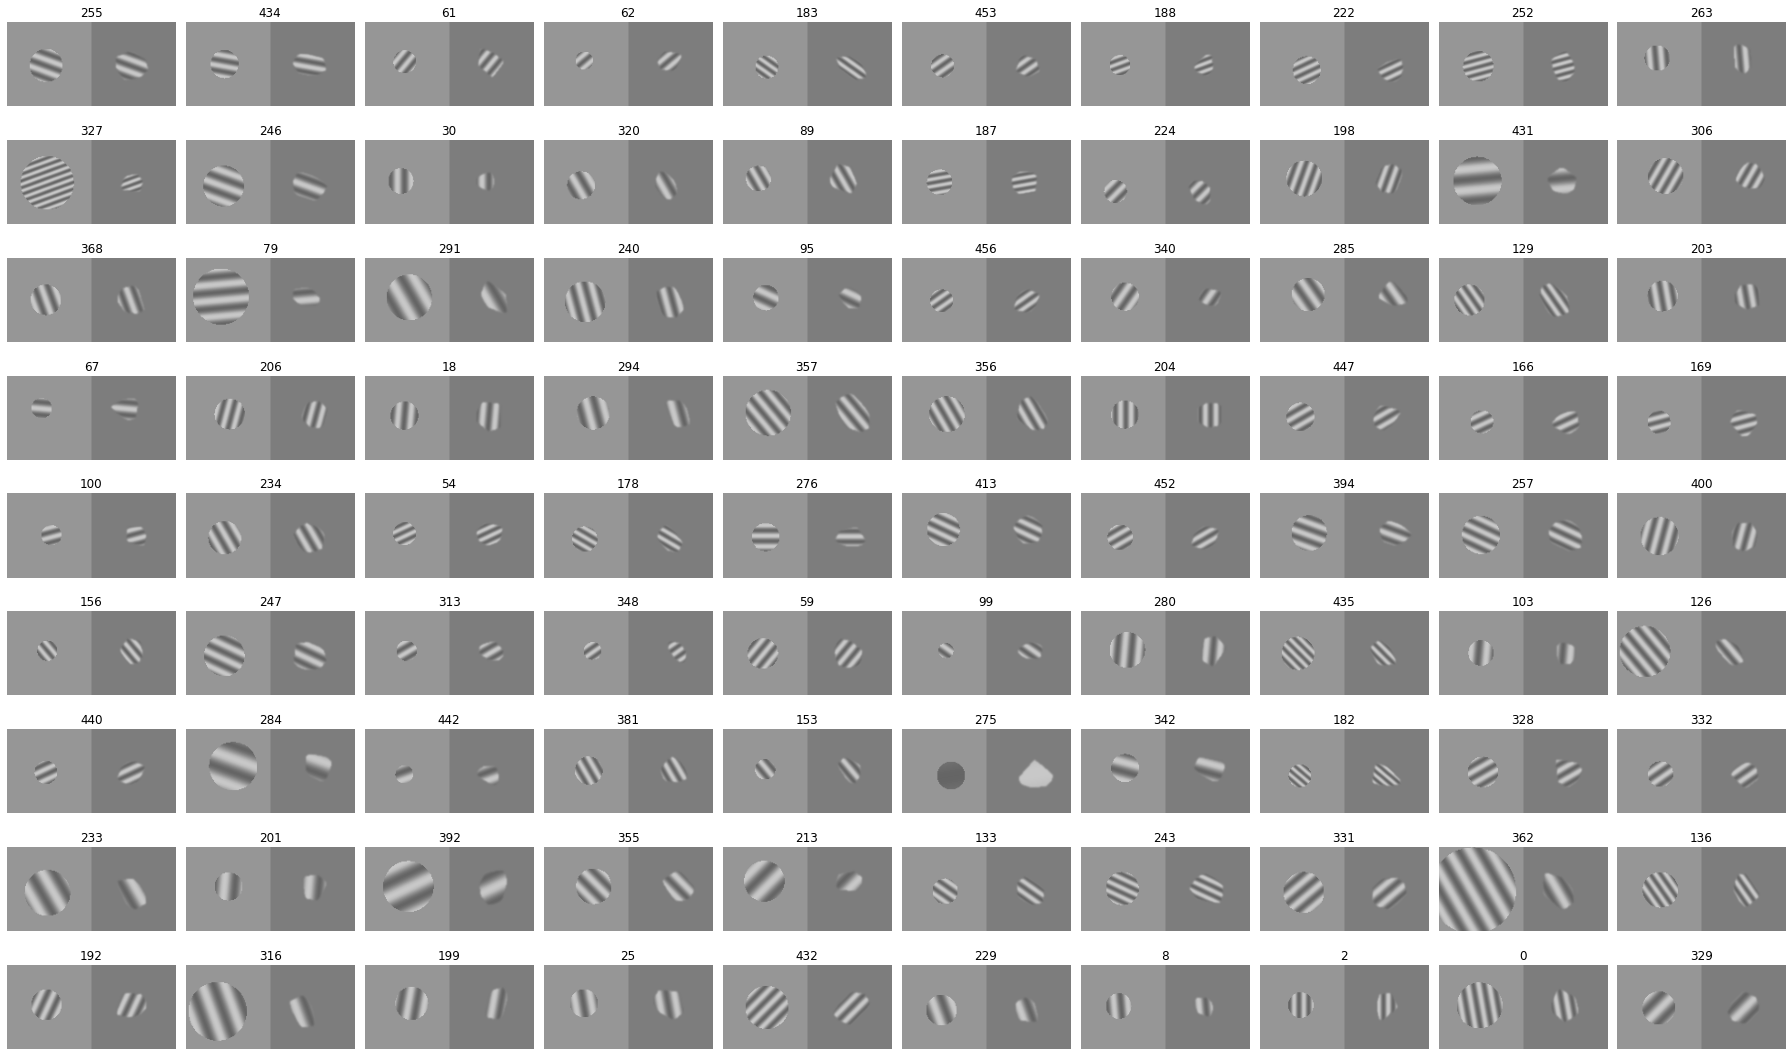

In [12]:
size_tuning_top_grating = [x[idx]['size_tuning_top_grating'] for idx in idxs]

plot_grid(
    images = np.concatenate([size_tuning_top_grating, masked_grating_max_stim], axis=2),
    titles = [str(k)  for k in idxs],
    grid_size=(9,10), 
    figsize=(25,15),
    display_min=55,
     display_max=200,
)

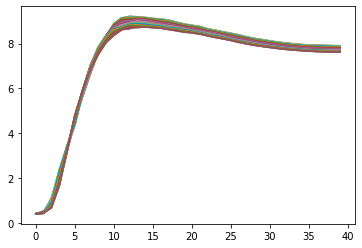

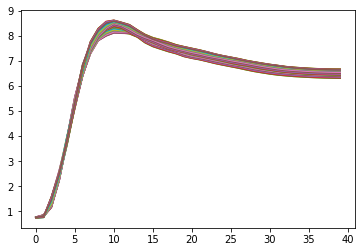

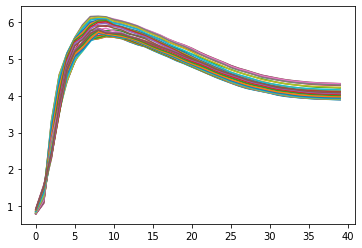

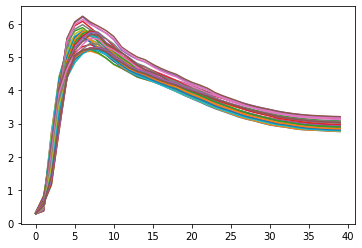

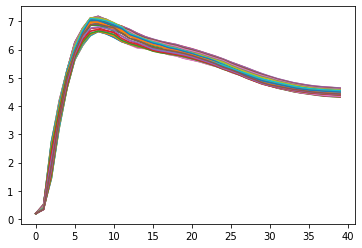

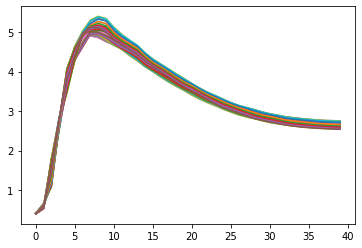

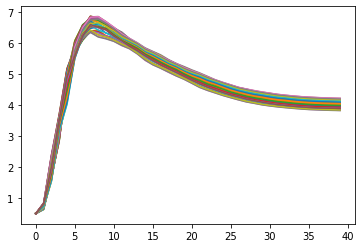

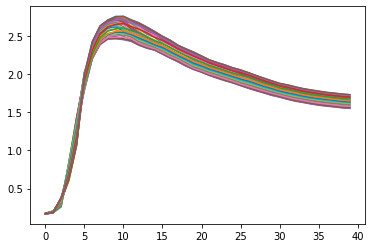

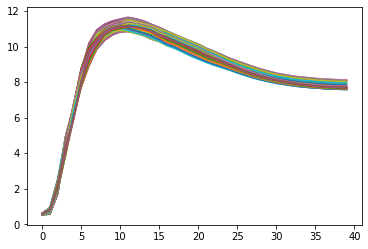

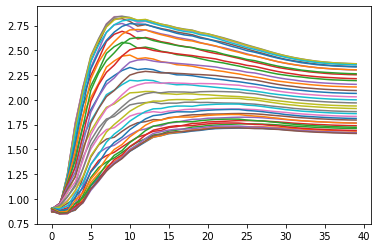

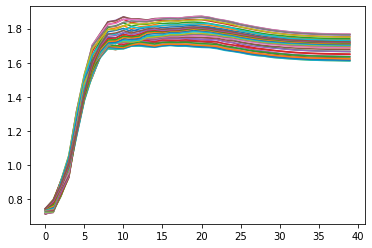

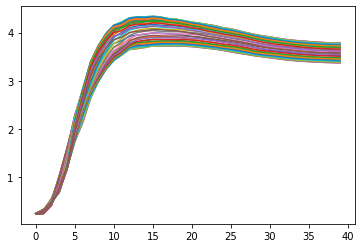

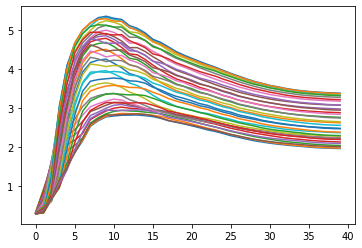

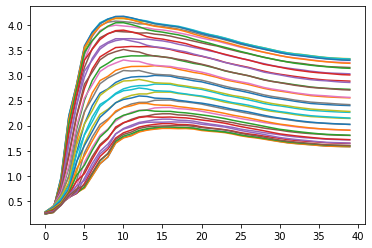

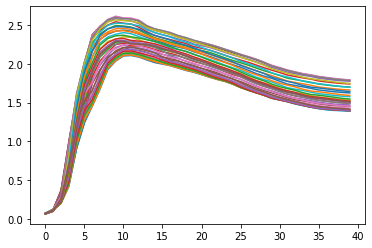

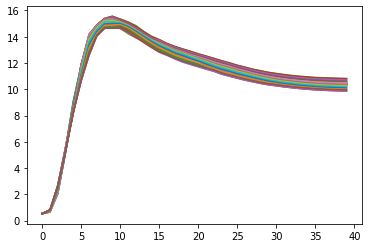

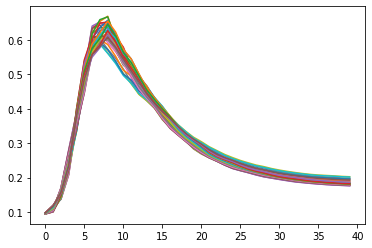

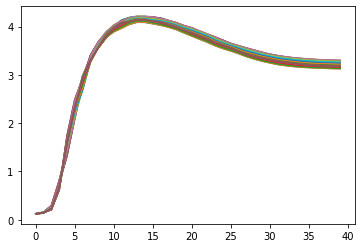

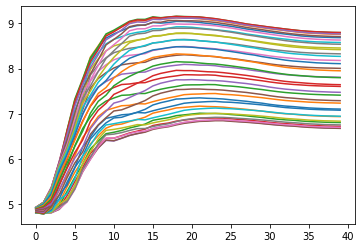

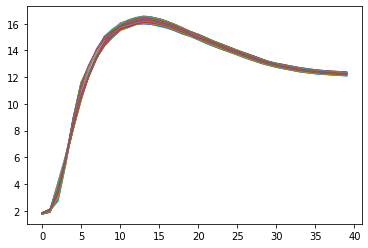

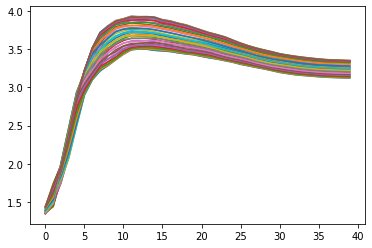

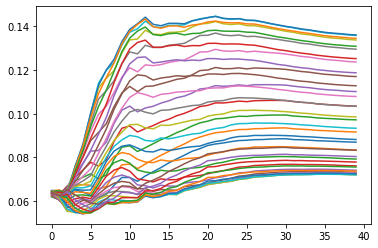

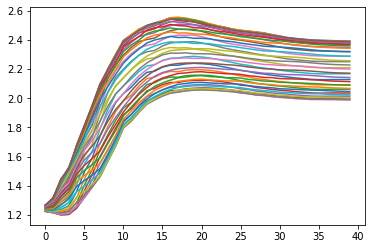

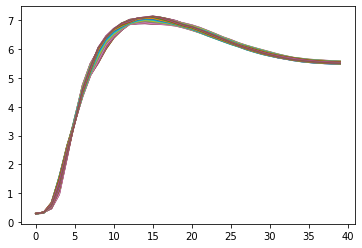

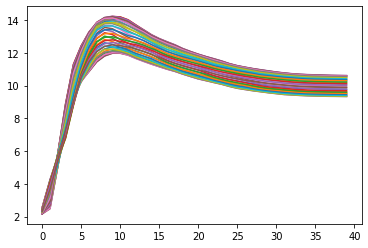

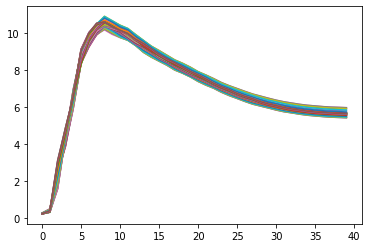

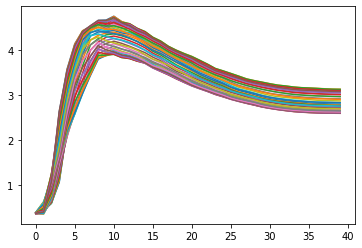

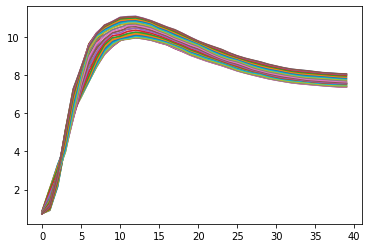

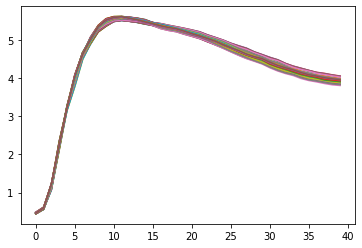

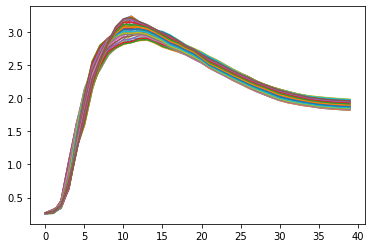

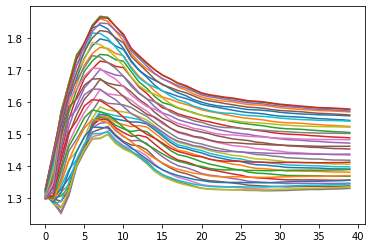

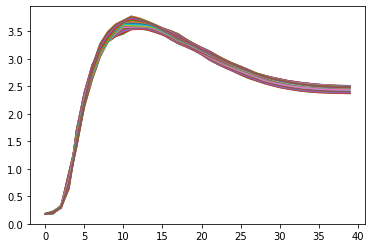

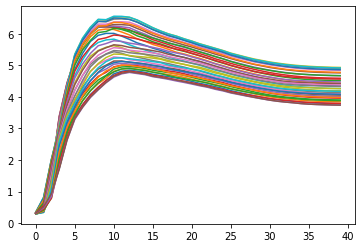

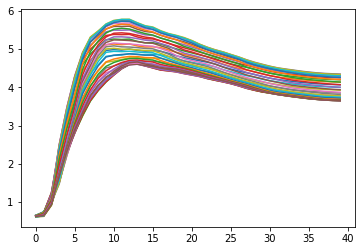

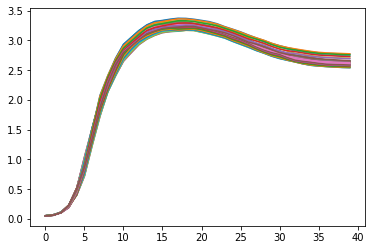

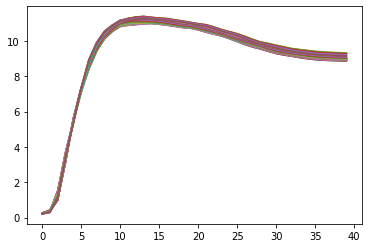

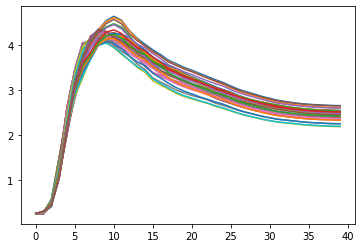

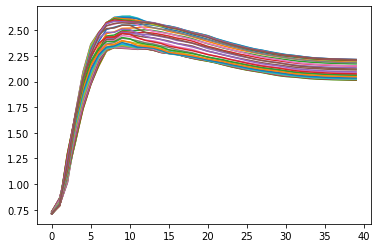

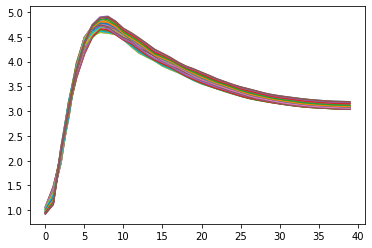

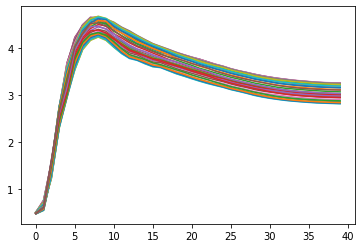

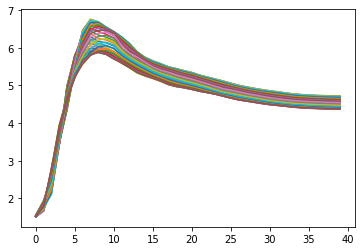

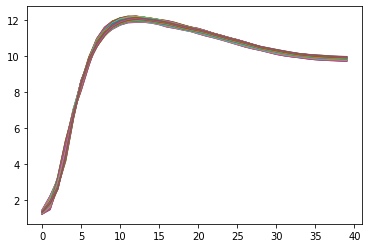

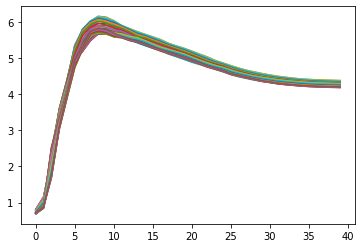

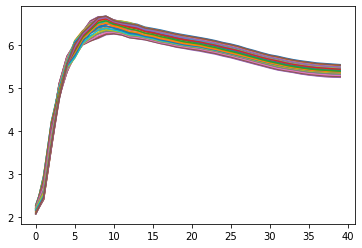

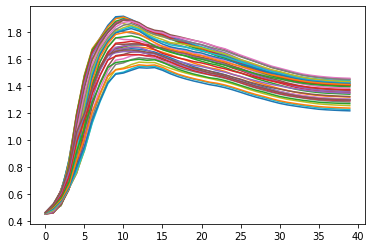

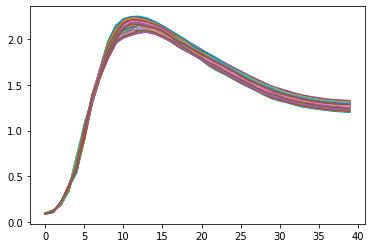

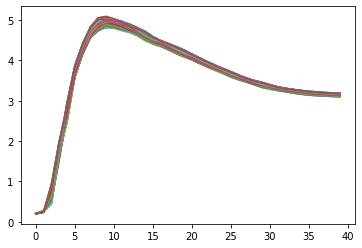

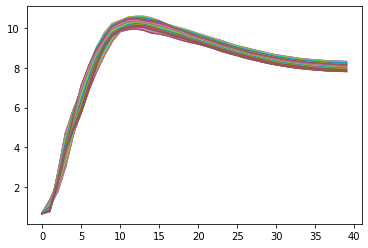

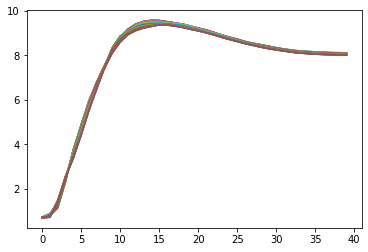

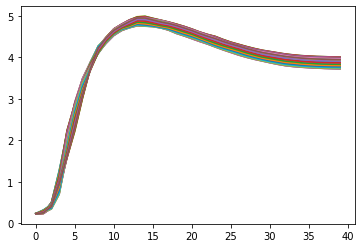

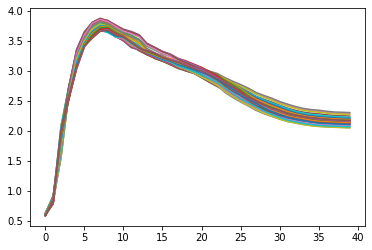

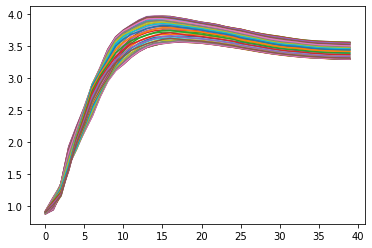

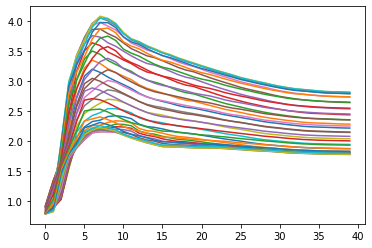

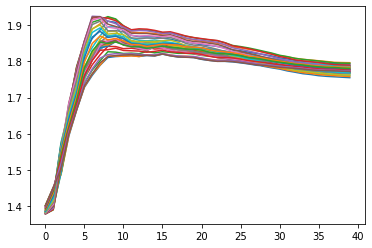

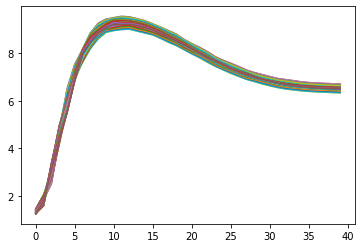

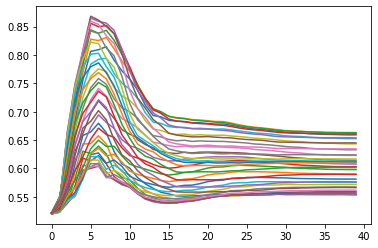

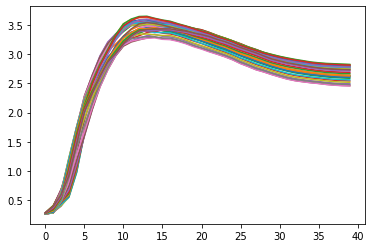

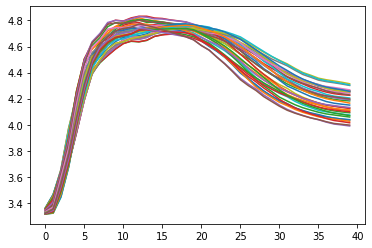

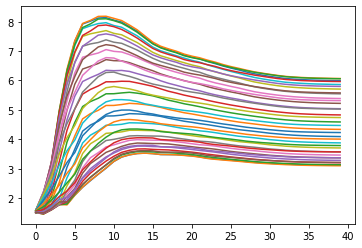

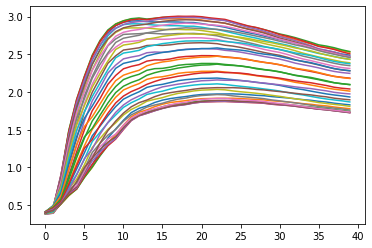

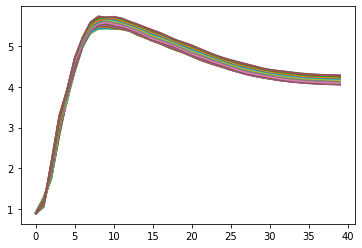

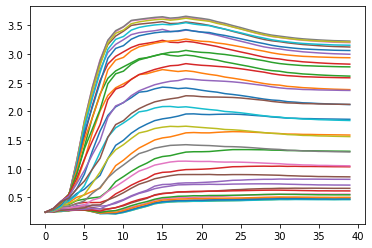

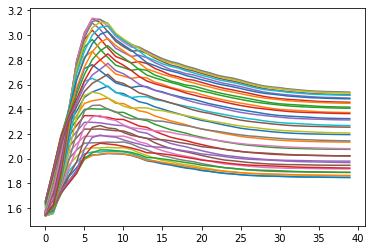

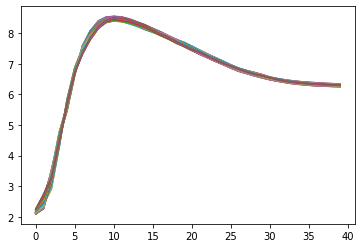

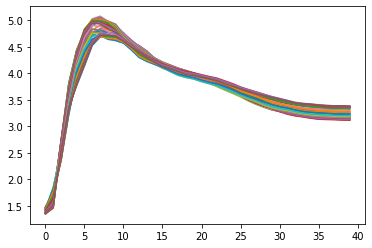

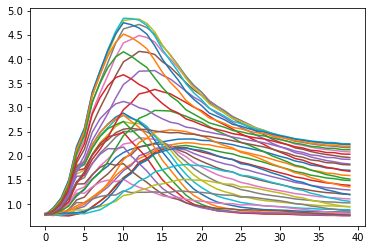

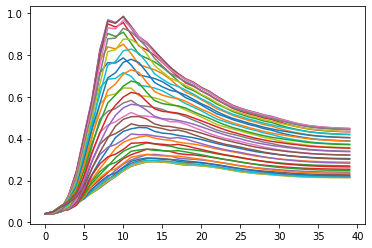

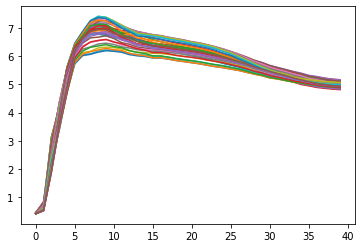

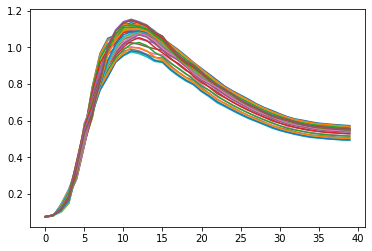

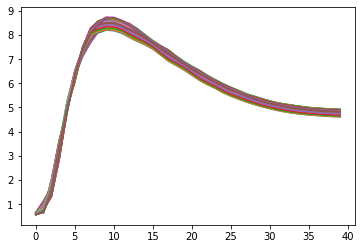

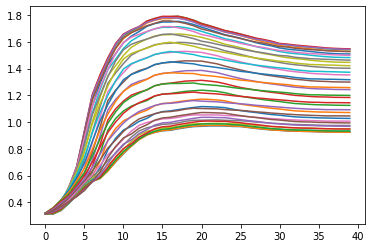

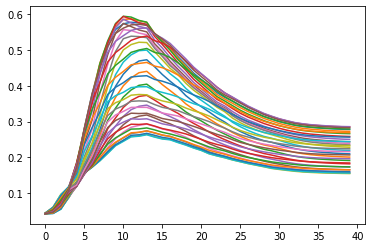

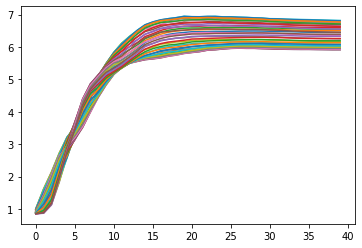

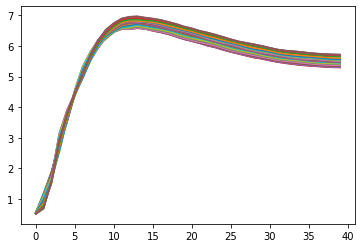

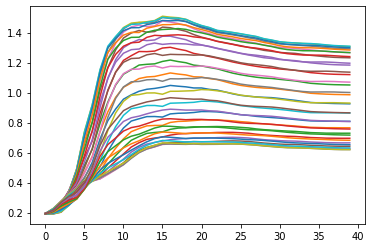

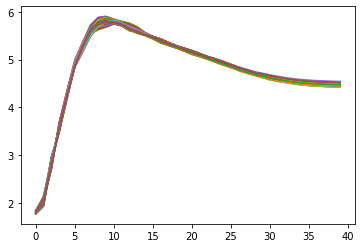

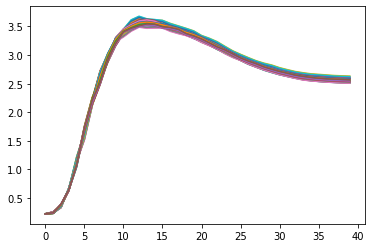

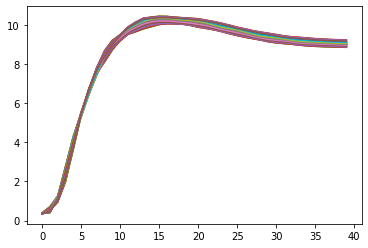

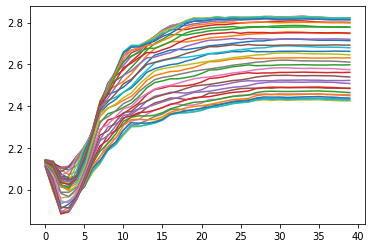

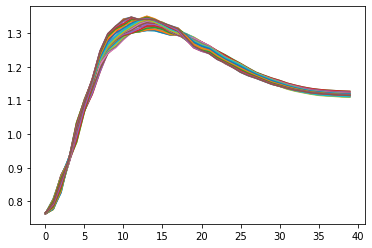

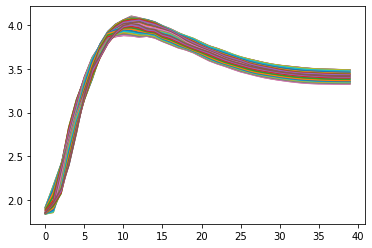

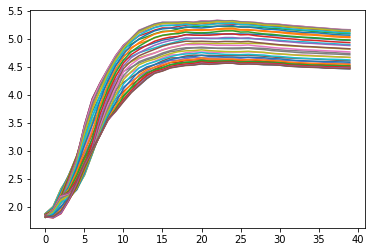

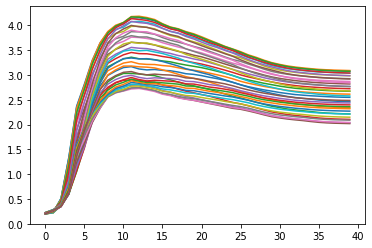

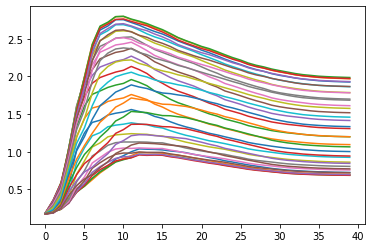

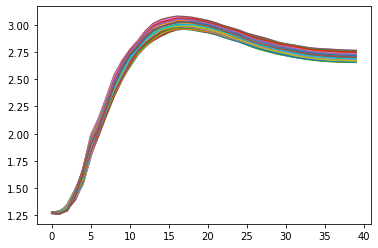

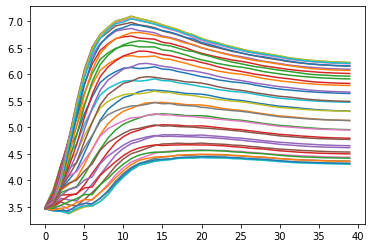

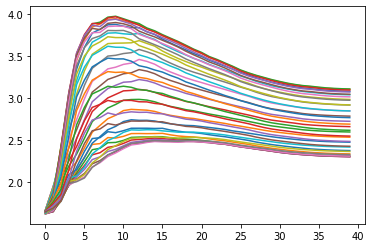

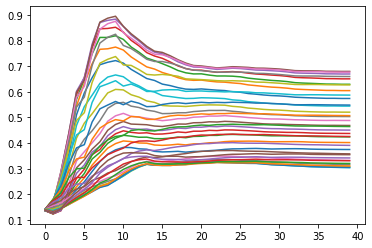

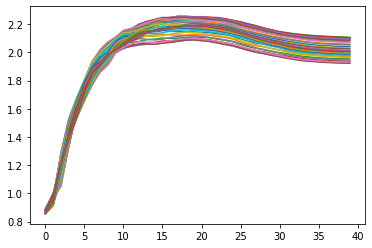

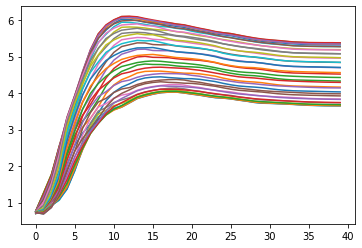

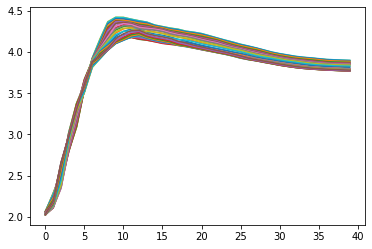

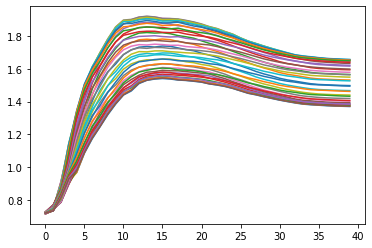

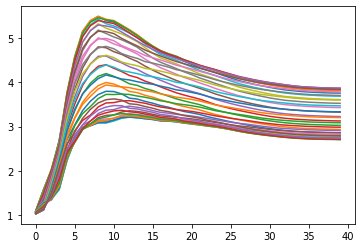

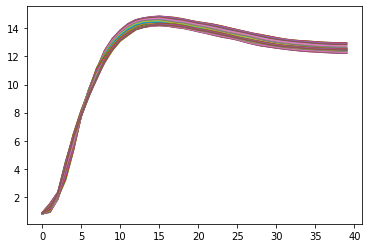

In [13]:
size_tuning_resp = [x[idx]['size_tuning_resp'] for idx in idxs]
for resp_curve in size_tuning_resp:
    plt.plot(resp_curve)
    plt.show()

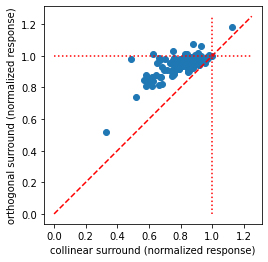

In [14]:
size_tuning_top_resp = np.array([x[idx]['size_tuning_resp'].mean(axis=-1).max() for idx in idxs])
oc_resp_coll = np.array([x[idx]['oc_resps'][0].mean() for idx in idxs])/size_tuning_top_resp
oc_resp_orth = np.array([x[idx]['oc_resps'][18].mean() for idx in idxs])/size_tuning_top_resp


def scatterplot(x, y):
    # Sample data for scatter plot

    # Create scatter plot
    plt.scatter(x, y)

    # Set the aspect of the plot to be equal
    # plt.axis('equal')

    x_max = max(x)

    # Set y-axis limits to be the same as x-axis
    plt.ylim(0, x_max + 1)  # Ensure y-axis matches x-axis limits

    # Draw bisectrice line
    plt.plot([0, x_max + 1], [0, x_max + 1], 'r--')  # Red dashed line for the bisectrice
    plt.xlim(left=0, right=1.25)  # Adjust the '+ 1' as needed
    # Show plot
    plt.axis('square')
    plt.show()


plt.scatter(oc_resp_coll,oc_resp_orth)
plt.vlines(1, 0, 1.25, 'r', linestyles='dotted')
plt.hlines(1, 0, 1.25, 'r', linestyles='dotted')
plt.plot([0,1.25], [0,1.25], 'r--')
plt.xlabel('collinear surround (normalized response)')
plt.ylabel('orthogonal surround (normalized response)')
plt.axis('square')
plt.show()


/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


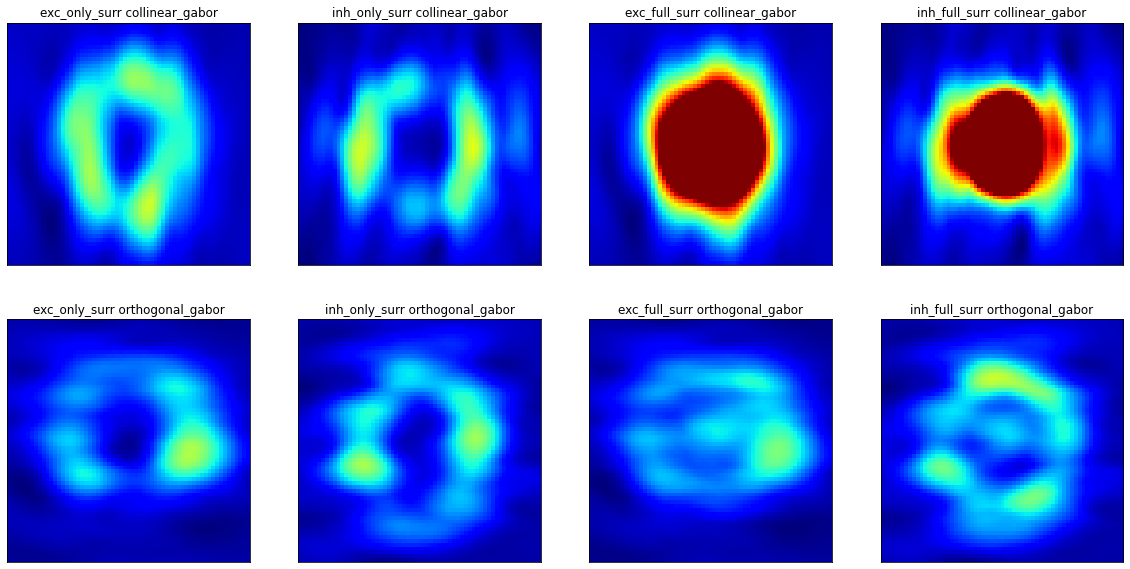

In [15]:
mask_mei = [x[idx]['mask_mei'] for idx in idxs]
preferred_oris = np.degrees(np.array([x[idx]['masked_grating_max_ori'] for idx in idxs]))


fig, ax = plt.subplots(2,4, figsize=(20, 10))
gabor_type = ['collinear_gabor', 'orthogonal_gabor']
from surroundmodulation.analyses import *
for j, surr_type in enumerate(['exc_only_surr', 'inh_only_surr',  'exc_full_surr', 'inh_full_surr']):
    surr = [x[idx][surr_type] for idx in idxs]
    output_list = analisys2(
        mask_mei, 
        surr, 
        preferred_oris,
        angles = [0, 90], 
        aspect_ratio=2
    )
    
    for i in range(2):
        ax[i, j].imshow(output_list[i].detach().cpu().numpy(), vmax=2, cmap='jet')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].set_title(surr_type + ' ' + gabor_type[i])
plt.show()